# Water Irrigation

In [35]:
import time
# import busio

# import board
# from board import SCL,SDA

# from adafruit_seesaw.seesaw import Seesaw
import requests
# from picamera import PiCamera

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
# import keras
# import RPi.GPIO as GPIO 
import time

In [36]:
def get_moisture():
    i2c_bus = busio.I2C(SCL,SDA)

    ss = Seesaw(i2c_bus, addr=0x36)

    touch = 0.0
    temp = 0.0

    while True:    # read moisture level through capacitive touch pad
        touch = touch + float(ss.moisture_read())
        # read temperature from the temperature sensor
        temp = float(ss.get_temp())

        #print("temp: " + str(temp) + "  moisture: " + str(touch))
        time.sleep(1)

    touch = touch/5
    temp = temp/5
    return touch

In [37]:
def Capture_Image:
    camera = PiCamera()
    camera.capture('/home/pi/Desktop/image.jpg')

SyntaxError: invalid syntax (Temp/ipykernel_4740/1790752236.py, line 1)

In [ ]:
def Image_Process(path):
    model = keras.models.load_model("vgg16_NP1.h5")
    image_size = (224, 224)
    img = keras.preprocessing.image.load_img(
        "abc1.jpg", target_size=image_size
    )
    img_array = keras.preprocessing.image.img_to_array(img)

    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    score = predictions[0]*100
    

In [ ]:
def Image_Processing()
    Capture_Image()
    Image_Process()
    return crop_status

Importing thr required modules

## Problem Definition and Anticedents and Consequents

Declaring the antecedents and consequents in the specified range.

In [73]:
soil_moisture = ctrl.Antecedent(np.arange(200, 1500, 1), 'soil_moisture')
PrecipitationProbability = ctrl.Antecedent(np.arange(0, 101, 1), 'PrecipitationProbability')
Precipitation = ctrl.Antecedent(np.arange(0, 101, 1), 'Precipitation')
crop_status = ctrl.Antecedent(np.arange(0, 2, 1), 'crop_status')
irrigation_duration = ctrl.Consequent(np.arange(0, 16, 1), 'irrigation_duration')

### Soil Moisture

Soil Moisture takes three crisp values : low, medium and high <br>

Soil Moisture takes Gaussian membership function. The parameters are universe of discourse, mean (centre) value of range, and standard deviation.

C:\Users\utsav\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


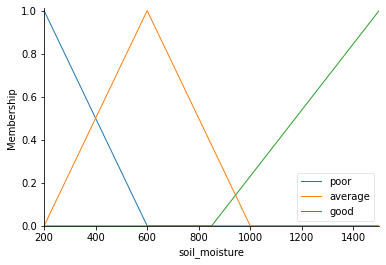

In [74]:
soil_moisture['poor'] = fuzz.trimf(soil_moisture.universe, [200, 200, 600])
soil_moisture['average'] = fuzz.trimf(soil_moisture.universe, [200, 600, 1000])
soil_moisture['good'] = fuzz.trimf(soil_moisture.universe, [850, 1500, 1500])
soil_moisture.view()

### Weather Forecast

Weather forecast is categorised in three different crisp values : Sunny, Cloudy and Rainy <br> 

Weather Forecast is defined using Gaussian membership function. The parameters are universe of discourse, mean (centre) value of range, and standard deviation.

C:\Users\utsav\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


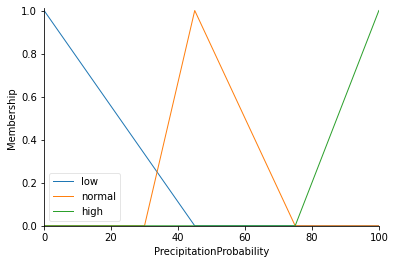

In [75]:
PrecipitationProbability['low'] = fuzz.trimf(PrecipitationProbability.universe, [0, 0, 45])
PrecipitationProbability['normal'] = fuzz.trimf(PrecipitationProbability.universe, [30, 45, 75])
PrecipitationProbability['high'] = fuzz.trimf(PrecipitationProbability.universe, [75, 100, 100])
PrecipitationProbability.view()

C:\Users\utsav\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


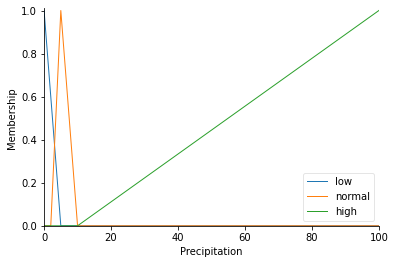

In [76]:
Precipitation['low'] = fuzz.trimf(Precipitation.universe, [0, 0, 5])
Precipitation['normal'] = fuzz.trimf(Precipitation.universe, [2, 5, 10])
Precipitation['high'] = fuzz.trimf(Precipitation.universe, [10, 100, 100])
Precipitation.view()

### Crop Status 

The Crop Status takes almost crisp values i.e. either dry, normal or high which can be defined using triangular membership fuction. <br>

It takes two arguments : universe of discourse, array [ starting value, centre value, ending value ]

C:\Users\utsav\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


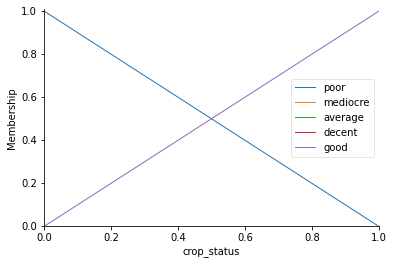

In [77]:
crop_status.automf()
crop_status.view()

### Consequent : Irrigation Duration (in minutes)

Irrigation Duration is in minutes in terms of less, medium and high. It also defined by Gaussian membership function.

C:\Users\utsav\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


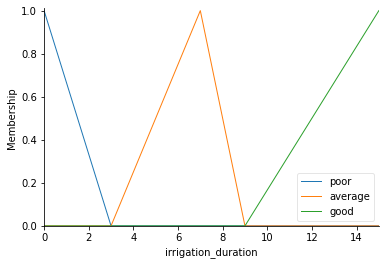

In [78]:
irrigation_duration['poor'] = fuzz.trimf(irrigation_duration.universe, [0, 0, 3])
irrigation_duration['average'] = fuzz.trimf(irrigation_duration.universe, [3, 7, 9])
irrigation_duration['good'] = fuzz.trimf(irrigation_duration.universe, [9, 15, 15])
irrigation_duration.view()

In [79]:
# irrigation_duration.automf(3)
# irrigation_duration.view()

## Defining Fuzzy Rules

The fuzzy rules are defined as follows: <br>

Simple inferences are : <br>

<list>

<li>If the moisture is low and crop status is low then based on the water tank level, the water should be supplied. <br>

<li>If the moisture is medium and forecast is rainy, we may not need to supply water for longer time. <br>

<li>If the moisture is high and crop status is high then without looking at other antecedents the water supply should be provided for less time. <br>
    
</list>

In [80]:
# i = 1
# for x in ["poor", "average", "good"]:
#     for y in ["low", "normal", "high"]:
#         for z in ["low", "normal", "high"]:
#             for w in ["poor", "good"]:
#                 a = ""
#                 if z == "high":
#                     a = "rule" + str(i) + " = ctrl.Rule(soil_moisture['" + x + "'] & PrecipitationProbability['" + y + "'] & Precipitation['" + z + "'] & crop_status['" + w + "'], irrigation_duration['poor'])"
#                 else:
#                     a = "rule" + str(i) + " = ctrl.Rule(soil_moisture['" + x + "'] & PrecipitationProbability['" + y + "'] & Precipitation['" + z + "'] & crop_status['" + w + "'], irrigation_duration[''])"
#                 print(a)
#                 i = i+1

In [81]:
rule1 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['good'])
rule2 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['good'], irrigation_duration['good'])
rule3 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule4 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['average'])
rule5 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule6 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule7 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['average'])
rule8 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['good'], irrigation_duration['average'])
rule9 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule10 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule11 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule12 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule13 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['average'])
rule14 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['good'], irrigation_duration['poor'])
rule15 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule16 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule17 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule18 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule19 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['good'])
rule20 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['good'], irrigation_duration['average'])
rule21 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule22 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['average'])
rule23 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule24 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule25 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['good'])
rule26 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['good'], irrigation_duration['average'])
rule27 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule28 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule29 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule30 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule31 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['average'])
rule32 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['good'], irrigation_duration['poor'])
rule33 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule34 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule35 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule36 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule37 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['average'])
rule38 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['good'], irrigation_duration['average'])
rule39 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule40 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule41 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule42 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule43 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['average'])
rule44 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['good'], irrigation_duration['poor'])
rule45 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule46 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule47 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule48 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule49 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['poor'])
rule50 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['good'], irrigation_duration['poor'])
rule51 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['poor'])
rule52 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule53 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule54 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])


## Creating Fuzzy Controller from Fuzzy Rules

In [82]:
waterpump_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35, rule36, rule37, rule38, rule39, rule40, rule41, rule42, rule43, rule44, rule45, rule46, rule47, rule48, rule49, rule50, rule51, rule52, rule53, rule54])
irrigation_system = ctrl.ControlSystemSimulation(waterpump_ctrl)

## Using Fuzzy Controller

Here, the situation is : Soil moisture is low, weather forecast is cloduy, crop is dry and tank has enough supply of water, so the irrgation should be done for medium time as the forecast may change to rainy and if there is more water in fields it may introduce fungus and other plant root related diseases.

Here the situation is as follows : <br>

The soil is medium moisturised, weather is sunny, crop is normal and tank is almost empty. So the water can be supplied for lower time until the tank gets totally empty.

The last case is given as : <br>

The soil is dry, the weather is sunny, crop is dry and tank level is almost full. Here crops can die due to less supply of water. We have enough water, we can supply water to the maximum rate possible.

6.257142857142856


C:\Users\utsav\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


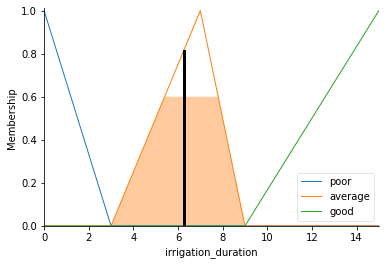

In [97]:
irrigation_system.input['soil_moisture'] = 605
irrigation_system.input['PrecipitationProbability'] = 99
irrigation_system.input['Precipitation'] = 2
irrigation_system.input['crop_status'] = 0
irrigation_system.compute()
print(irrigation_system.output['irrigation_duration'])
irrigation_duration.view(sim=irrigation_system)

In [84]:
def Output()
    irrigation_system.input['soil_moisture'] = get_moisture()
    PrecipitationProbability,Precipitation = get_weather_params()
    irrigation_system.input['PrecipitationProbability'] = PrecipitationProbability
    irrigation_system.input['Precipitation'] = Precipitation
    irrigation_system.input['crop_status'] = Image_Processsing()
    irrigation_system.compute()
return irrigation_system.output['irrigation_duration']

SyntaxError: invalid syntax (Temp/ipykernel_4740/387708837.py, line 1)

In [ ]:
time = []
for soil in range(200,1501):
  for prob in range(0,101):
   for pro in range(0,101):
     for im in range(0,2):
      irrigation_system.input['soil_moisture'] = soil
      irrigation_system.input['PrecipitationProbability'] = prob
      irrigation_system.input['Precipitation'] = pro
      irrigation_system.input['crop_status'] = im
      irrigation_system.compute()
      time.append(irrigation_system.output['irrigation_duration'])

In [ ]:
ledl = 8

GPIO.setwarnings(False)
GPIO.setmode (GPIO.BOARD) 
GPIO.setup(ledl, GPIO.OUT)


GPIO.output (ledl, True)
#print("yes")
time.sleep()

GPIO.output (ledl, False)
#print("no")


In [13]:
pip install sqlite3

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [6]:
import sqlite3

In [36]:

conn = sqlite3.connect('data.db')

c = conn.cursor()
c.execute("""CREATE TABLE Customer_Info(username text, password text, location integer)""")
conn.commit()

conn.close()

In [4]:
def add_to_database(username, password, location):
        conn = sqlite3.connect('data.db')

        c = conn.cursor()

        all_user = c.execute("select username from Customer_Info")
        all_user = all_user.fetchall()
        print(all_user)
        if (username,) in all_user:
                conn.commit()
                conn.close()
                return "error1"
        else:
                c.execute(
                        "insert into Customer_Info values (:username,:password,:location)",
                        {
                        'username': username,
                        'password': password,
                        'location': location
                        }
                )
                conn.commit()
                conn.close()
                return "success"
        


In [7]:
add_to_database("a","b",2)

[('a',), ('Yugma',), ('xyz',)]


'error1'

In [8]:
def check_in_database(username, password):
    conn = sqlite3.connect('data.db')

    c = conn.cursor()
    password1 = c.execute("select username, password, location from Customer_Info")
    password1 = password1.fetchall()
    temp1 = (username, password)
    flag = 0
    print(password)
    for i, j, k in password1:
        if i == username and j == password:           
            pincode = k
            flag = 1
            conn.commit()
            conn.close()
            return "success",pincode
    if flag == 0:
        conn.commit()
        conn.close()
        return "error",0

In [ ]:
check_in_database("a","b")

b
a
b
2


('success', 2)

In [ ]:
conn = sqlite3.connect('data_params.db')

c = conn.cursor()
c.execute("""CREATE TABLE params(username text,soil_moisture integer, precipitation real, preci_prob real,crop_status integer,irrigation_dur real,date text)""")
conn.commit()

conn.close()

In [16]:
def add_to_database(username,soil_moisture, precipitation, preci_prob, crop_status,irrigation_dur,date):
        conn = sqlite3.connect('data_params.db')

        c = conn.cursor()

        c.execute(
                "insert into params values (:username,:soil_moisture,:precipitation,:preci_prob,:crop_status,:irrigation_dur,:date)",
                {
                'username': username,
                'soil_moisture': soil_moisture,
                'precipitation': precipitation,
                'preci_prob': preci_prob,
                'crop_status': crop_status,
                'irrigation_dur': irrigation_dur,
                'date': date
                }
        )
        conn.commit()
        conn.close()

In [ ]:
def weather(x):
    

In [15]:
from flask import Flask,redirect,url_for,render_template,request
from flask import Markup
app = Flask(__name__)

@app.route('/')
def login():
    #return "HEY"
    return render_template('index.html')

@app.route('/signin',methods = ['POST'])
def collect():
    if request.method == 'POST':
        print("in")
        username = request.form['username']
        print(username)
        password = request.form['Password']
        print(password)
        location = request.form['location']
        print(location)
        m = add_to_database(username,password,location)
        if m == "success" :
            return render_template('index.html')
        elif m == "error1":
            return render_template('index.html', error = "Username already exists")

@app.route('/dashboard',methods = ['POST'])
def verify():
    if request.method == 'POST':
        username = request.form['user']
        print(username)
        password = request.form['pass']
        x = check_in_database(username,password)
        if x[0] == "error":
            return render_template('index.html', error = "Invalid Username or password")
        else :
            #weather(x[1])
            return render_template('dashboard.html',preci_pro = 2,prec = 3,image_status = "Healthy",username = username )

        
@app.route('/submit',methods = ['POST','GET'])
def get_duration():
    if request.method == 'POST':
        moisture_content = float(request.form['sensor'])
        #preci = float(request.form['preci'])
        #preci_prob = float(request.form['preci_prob'])
        image_path = request.form['image']
        img_status = Image_Process(image_path)
        preci,preci_prob = weather
        

        
if __name__=='__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [23/Apr/2022 22:17:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Apr/2022 22:17:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Apr/2022 22:17:57] "POST /signin HTTP/1.1" 200 -


in
vrukshal
1234
3
[('a',), ('Yugma',), ('xyz',), ('1',), ('456',)]


127.0.0.1 - - [23/Apr/2022 22:18:07] "POST /dashboard HTTP/1.1" 200 -


vrukshal
1234
